## Load the dataframe

In [1]:
import pandas as pd

C:\Users\igoro\AppData\Local\Temp\ipykernel_14500\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=['    DATE'])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


## Show certain rows

In [4]:
df[0:20]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
5,1,35381,1860-01-06,16,0
6,1,35381,1860-01-07,5,0
7,1,35381,1860-01-08,-27,0
8,1,35381,1860-01-09,-4,0
9,1,35381,1860-01-10,-17,0


## Show certain columns 

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [7]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


## Simple statistics and filtering

In [8]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10 

6.360787526128467

In [9]:
df.loc[df['   TG'] != -9999].mean()

STAID                                 1.0
 SOUID                       35381.009943
    DATE    1932-12-25 01:56:39.468956672
   TG                           63.607875
 Q_TG                            0.000056
dtype: object

In [10]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10 

26.2

In [11]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10 

-28.8

In [12]:
df.loc[df['   TG'] != -9999]['   TG'].sum() / 10 

337776.9


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

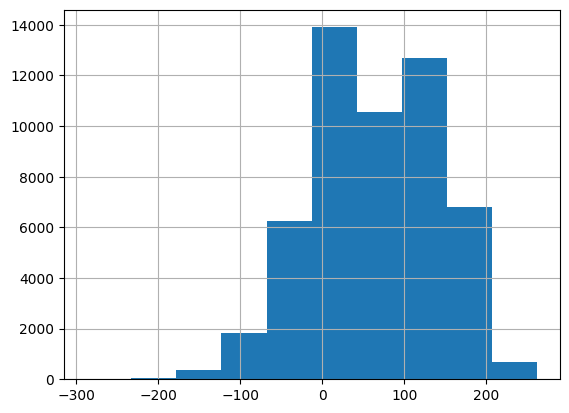

In [13]:
!pip install matplotlib
df.loc[df['   TG'] != -9999]['   TG'].hist()

## Get certain cells

In [14]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [23]:
df.loc[df['    DATE']=="1987-09-12"]['   TG'] / 10

46640    10.7
Name:    TG, dtype: float64

In [22]:
df.loc[df['    DATE']=="1987-09-12"]['   TG'].squeeze() / 10

10.7

In [16]:
df.loc[df['   TG']==df['   TG'].max()]['    DATE']

3150   1868-08-16
Name:     DATE, dtype: datetime64[ns]

In [19]:
df.loc[df['   TG']==df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [20]:
df.loc[3, '   TG'] # index = 3 and column = 'TG'

37

## Calculate a new column out of existing column

In [31]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG']==-9999, np.nan) # creating a new column, values will be values of the ['   TG'] column w/o -9999 values, we can read mask() method as without

In [36]:
df["TG"] = df['TG0'] / 10

In [37]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN


In [34]:
df["Fahrenheit"] = df["TG"] * (9/5) + 32

In [35]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82,NaN


## Plotting

<Axes: >

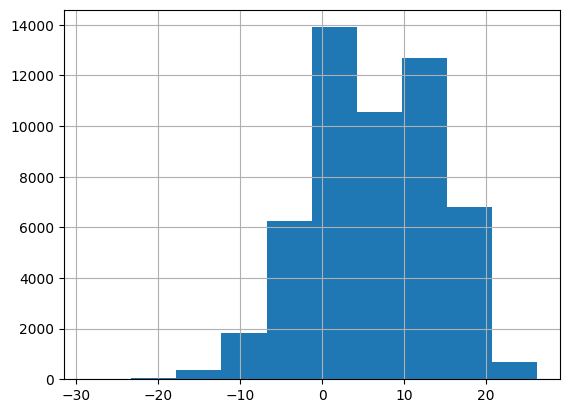

In [39]:
df["TG"].hist()

<Axes: xlabel='    DATE'>

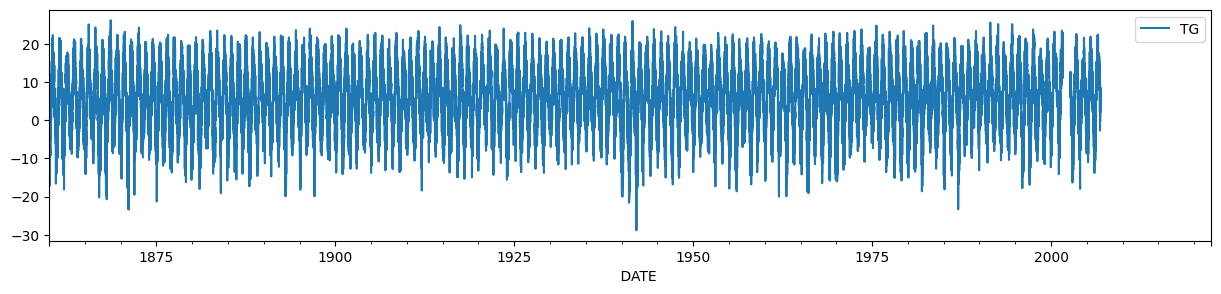

In [41]:
df.plot(x='    DATE', y= 'TG', figsize=(15, 3)) # 15 stands for horizontal and 3 for vertical axis

<Axes: xlabel='    DATE'>

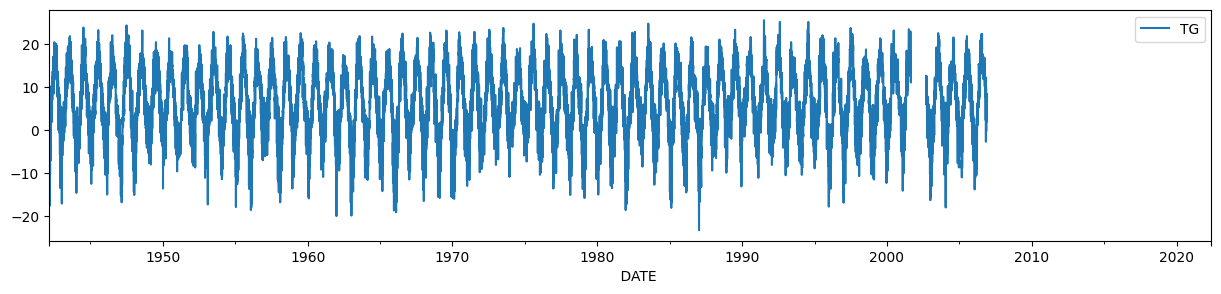

In [49]:
df[30000:].plot(x='    DATE', y= 'TG', figsize=(15, 3))